## Implementação do artigo, visando um melhor entendimento para criação de um tutorial adequado para aqueles que pretendem reproduzí-lo.

### **Título:**
## Training and Meta-Training Binary Neural Networks with Quantum Computing

### **Autores:**
Fawaz, Abdulah, et al.

### **Grupo que criou o resumo e tutorial:**
André, Daivid e Felipe


# **Passo FeedFoward da Rede**

### Inicializando o qiskit e verificando os backends disponíveis.

In [2]:
## matplotlib to see the circuits
%matplotlib inline
## qiskit standart
from qiskit import *

In [3]:
## See available eviroments
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

### Objetivo deste Jupyter

Queremos ao final construir uma rede feedfoward entendendo cada parte da rede e o circuito criado.

- Devemos entender como é dada a multiplicação dos pesos;
- Devemos entender a função de ativação;
- Devemos entender a criação de um neurônio artificial;
- Devemos entender a criação de uma rede composta por 3 entradas para 2 neurônios na primeira camada, e 1 neurônio de saída;

### 1. Entendendo as partes do Perceptron

#### 1.1 Mutiplicando os pesos pelas entradas

In [4]:
# Definindo a multiplicação de um peso por uma entrada.
def multiplyWeightInput(x, y):
    circuit.x(x)
    circuit.cx(x, y)
    circuit.x(x)

Do qubit 0 ao qubit 2 do array temos os pesos e os demais são as entradas, logo:

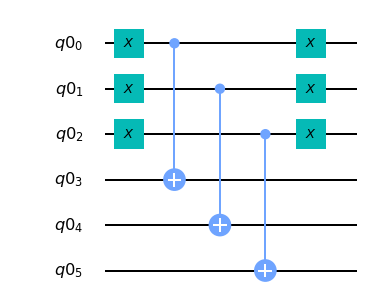

In [5]:
qWI = QuantumRegister(6)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI,)
# Definindo a quantidade de inputs da rede
qtd_input = 3

# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### 1.2 Criando a função de Ativação Majority para 3 entradas

In [6]:
# Essa função cria a majority definida no artigo para um perceptron com 3 entradas.
def activationFunction(listaQubit):
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.barrier()
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.barrier()
    circuit.ccx(listaQubit[1], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[0])
    circuit.ccx(listaQubit[0], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[0])
    circuit.barrier()
    circuit.ccx(listaQubit[0], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[1])
    circuit.ccx(listaQubit[1], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[1])
    circuit.barrier()

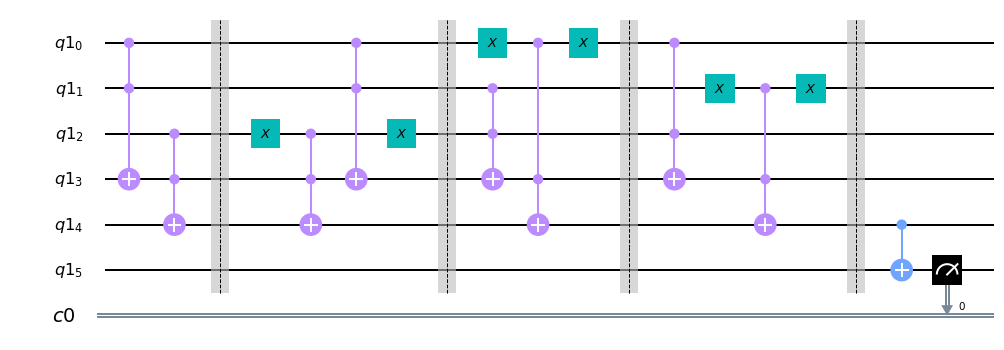

In [7]:
qWI = QuantumRegister(6) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)

# Então, aqui temos a implementação de um perceptron com 3 entradas.
activationFunction(qWI[0:5])
circuit.cx(qWI[4], qWI[5])
circuit.measure(qWI[5], c[0])

# -----------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### 1.3 Exemplo da função majority

Veja a entrada |000>, devemos ter a saída 0.

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


Veja a entrada |110>, devemos ter a saída 1.

In [9]:
qWI = QuantumRegister(6) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)

circuit.x(qWI[0])
circuit.x(qWI[1])
circuit.x(qWI[2])

# Então, aqui temos a implementação de um perceptron com 3 entradas.
activationFunction(qWI[0:5])
circuit.cx(qWI[4], qWI[5])
circuit.measure(qWI[5], c[0])

backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1': 1024}


### 2. O Perceptron
 
Neste exemplo temos entradas dos pesos como 0 e inputs como 0, é fácil ver que, de acordo com o circuito a saída deve ser 1.

#### 2.1 Criando o Perceptron

Criamos o perceptron utilizando as funções de mu

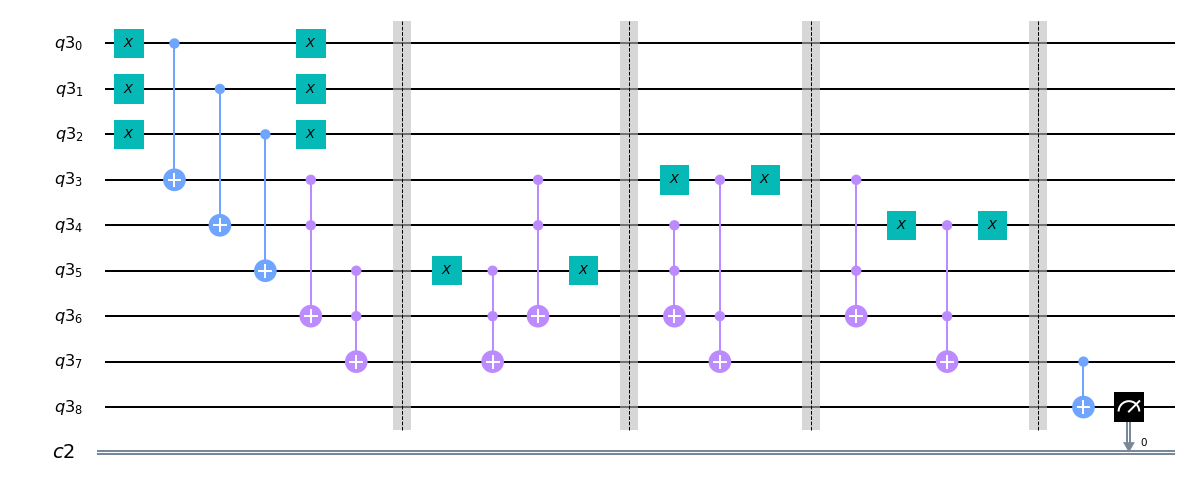

In [10]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(9) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)
# definindo a quantidade de inputs
qtd_input = 3
# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(qWI[3:8])
circuit.cx(qWI[7], qWI[8])
circuit.measure(qWI[8], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### Executando o circuito

In [11]:
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1': 1024}


#### Vejamos um segundo exemplo com pesos |000> e entradas |101>

É fácil perceber que a saída será: 0

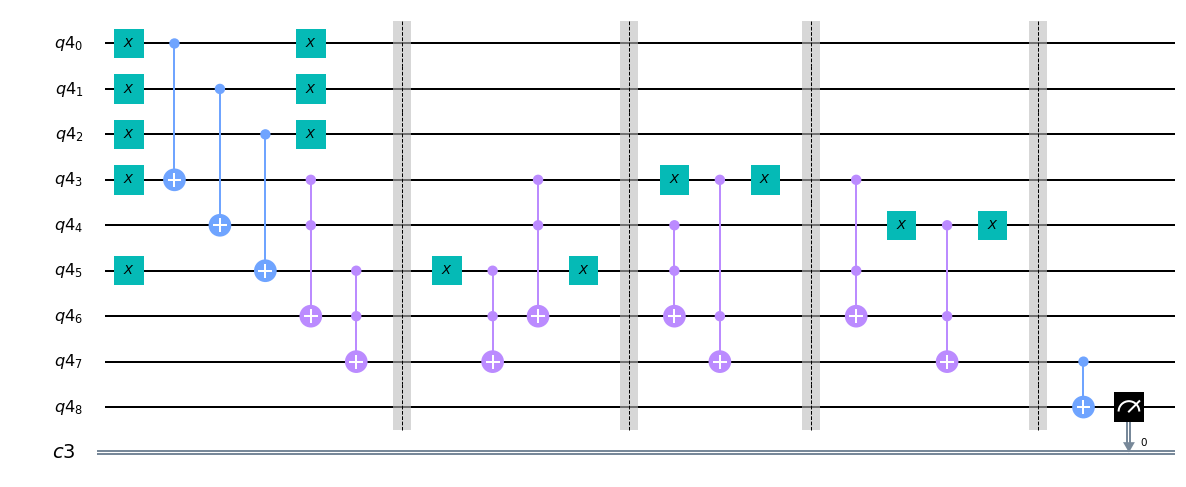

In [12]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(9) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3
# Mudando os inputs para que fique |101>
circuit.x(qWI[3])
circuit.x(qWI[5])
# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(qWI[3:8])
circuit.cx(qWI[7], qWI[8])
circuit.measure(qWI[8], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [13]:
#Executando o circuito
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


#### Compreendendo o resultado

Pudemos perceber que se necessitamos alterar as entradas, basta utilizar o operador "X" nos bits que desejamos que sejam 1. Além disso é fácil verificar que a função majority explicada pelo autor do Artigo segue o segunte padrão:

Pesos |000> e seguintes inputs, temos:

Inputs * Pesos => Saída  
|000> * |000>  => 1  
|001> * |000>  => 1  
|010> * |000>  => 1  
|011> * |000>  => 0  
|100> * |000>  => 1  
|101> * |000>  => 0  
|110> * |000>  => 0  
|111> * |000>  => 0

Ao alterar os pesos, alteramos as saídas também.

### Vejamos a construção da Rede Neural

A rede neural é composta por dois neurônio de entrada e dois neurônios de saída.
Neste primeiro exemplo, criaremos a rede sem otimizar o circuito, ficará grande porém fidedigno ao esquema correto apresentado pelo artigo.

P.s. Existem várias maneiras de implementar este circuito!

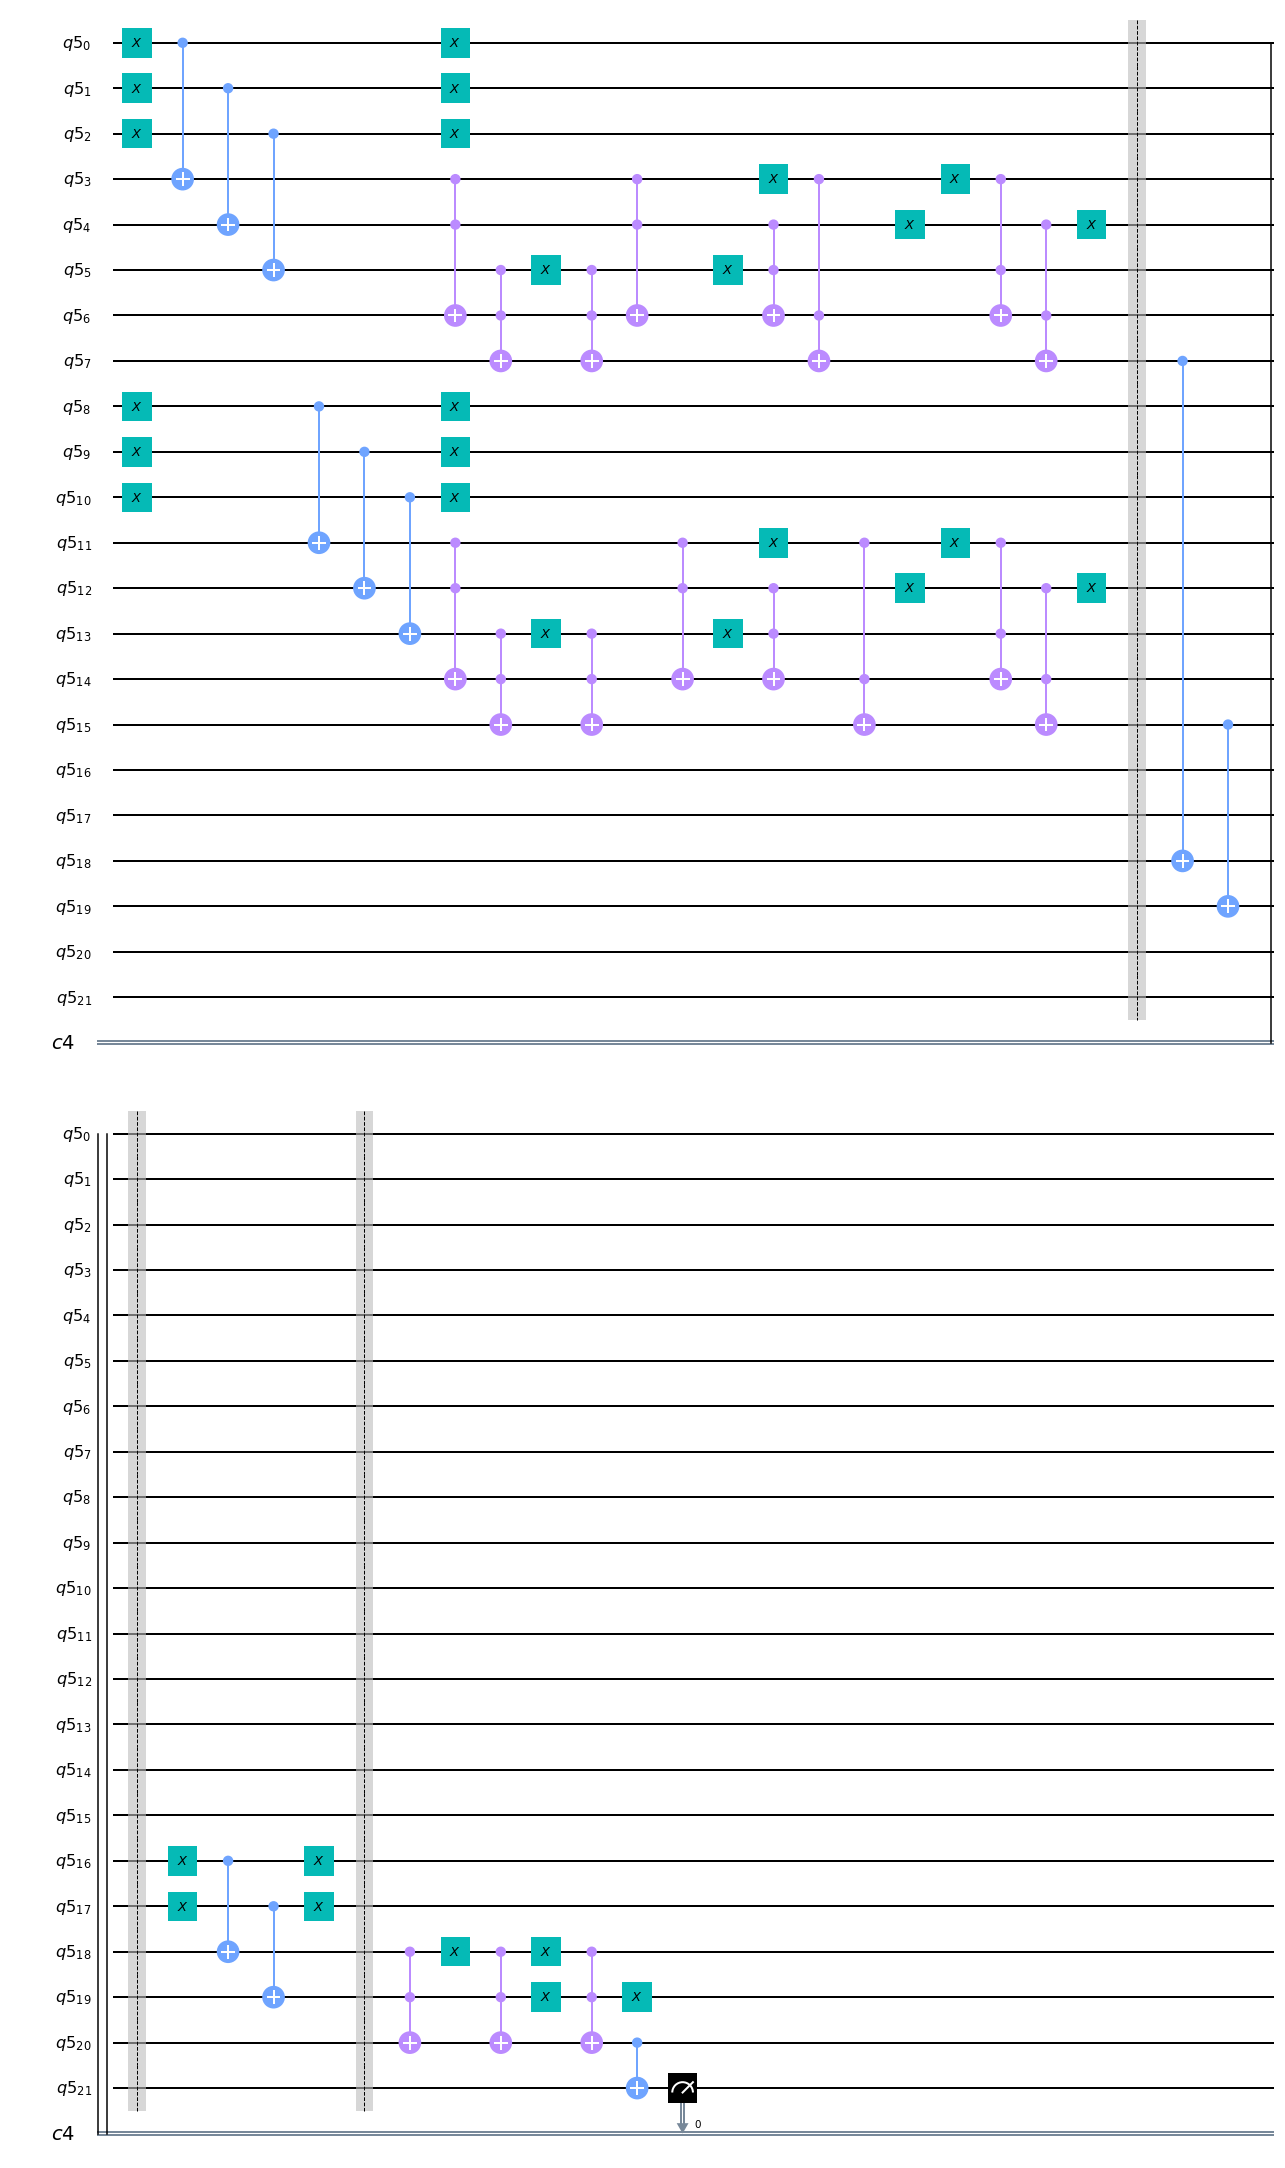

In [14]:
# Redefini a função majority sem as barreiras para facilitar a visualização, 
# isto não afetará o resultado do circuito.
def activationFunction(listaQubit):
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[1], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[0])
    circuit.ccx(listaQubit[0], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[0])
    circuit.ccx(listaQubit[0], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[1])
    circuit.ccx(listaQubit[1], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[1])

# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(22) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
[multiplyWeightInput(qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]

# Vejamos o segundo perceptron que também tem 3 entradas.
[multiplyWeightInput(qWI[i], qWI[i + qtd_input]) for i in range(8, 11)]

activationFunction(qWI[3:8])
activationFunction(qWI[11:16])
circuit.barrier()
circuit.cx(qWI[7], qWI[18])
circuit.cx(qWI[15], qWI[19])
circuit.barrier()

multiplyWeightInput(qWI[16], qWI[18])
multiplyWeightInput(qWI[17], qWI[19])
circuit.barrier()

circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[18])
circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[18])
circuit.x(qWI[19])
circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[19])

circuit.cx(qWI[20],qWI[21])

circuit.measure(qWI[21], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [16]:
#Executando o circuito
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}
